# Mapas con folium

En este notebook, vamos a ver como generar mapas para presentar información agregando marcadores, marcadores con información adicional, polígonos, gráficos y por último una animación.

En folium, un mapa es como un "lienzo" blanco. Puedes agregar, de forma incremental, capas al mapa (lienzo) para agregar información y hacerlo visualmente llamativo. 

La función "Map" de folium genera un mapa. Para ello, requiere como parámetro una ubicación de la siguiente forma:
* Tupla: (lat, lon)
* lista: [lat, lon]

Otro parámetro a tener en cuenta al momento de crear un mapa base es **"tiles"**. Por defecto, este parámetro es tiene asignado el valor "OpenStreetMap"; existen otros más que puedes usar para modificar la apariencia de tu mapa:

- "Mapbox Bright"
- "Mapbox Control Room"
- "Stamen"
- "Cloudmade"
- "Mapbox"
- "CartoDB"

A continuación, vamos a comprobar que un mapa es un "lienzo" en blanco en el que puedes agregar capas, para ello, utilizaremos las coordenadas de Madrid para el parámetro "location" y "None" para el parámetro "tiles". Vamos a almacenar el resultado de esta función (el mapa) en la variable "m".



In [1]:
import pandas as pd
import folium

In [2]:
madrid_coordinates = (40.416709, -3.703492)
m = folium.Map(location=madrid_coordinates,
               tiles=None)
m

Como se observa, aunque hemos pasado una ubicación al parámetro "location", la ausencia del un "tiles" hace que el mapa se muestre en blanco. 

Vamos a invocar la misma función, pero utilizando una de las opciones disponibles para el parámetro "tiles", mencionadas anteriormente.

In [3]:
m = folium.Map(location=madrid_coordinates,
               tiles="OpenStreetMap")

m

Gracias al parámetro "tiles", se puede observar que las coordenadas pertenecen a la Ciudad de Madrid; estas, son ahora el centro de nuestro mapa y, si queremos un mayor detalle, podemos modificar el valor del parámetro "zoom_start" de la función "Map". Por defecto su valor es 10, pero puede tomar valores mayores o menores en el rango de 0 (zoom out) a 18 (zoom in) dependiendo de las necesidades.

In [4]:
m = folium.Map(location=madrid_coordinates, 
               zoom_start=13, 
               tiles="OpenStreetMap")

m

## Marcadores

En esta sección vamos a ver cómo agregar un nuevo elemento al mapa: el marcador. A través de un marcador es posible convertir un par de coordenadas, o varias, en elementos visuales sobre el mapa, para facilitar la ubicación de lugares de interés.

In [5]:
marker = folium.Marker(location=madrid_coordinates)

Tal y como se observa, para crear un marcadador basta con utilizar la función "Marker" y pasar como parámetro una ubicación. Para visualizar un marcador en el mapa, como se menciono antes, es necesario agregarlo; para ello, se utiliza la función "add_to" y como parámetro de ella el mapa a que se quiere agregar el marcador. 

In [6]:
marker.add_to(m)
m

Ejecutar varias veces la celda anterior dará como resultado un mapa con un número de marcadores igual al número de veces que se invoca la función. Visualmente, un único marcador sera visible, ya que todos hacen referencia a la misma ubicación, en otras palabras, estos serán apilados uno sobre otro en la misma ubicación. A continuación, crearemos una función que nos permita comprobar esto. 

In [7]:
import random


def generate_new_coordinates(coor_initial):
    lat = madrid_coordinates[0] 
    lon = madrid_coordinates[1]
    new_position = (lat + random.uniform(0.00, 0.03), lon + random.uniform(0.00, 0.03))
    return new_position
    
    
def add_markers(quantity):
    base_position = madrid_coordinates
    for i in range(0, quantity):
        base_position = generate_new_coordinates(base_position)
        # Creación de un marcador con nuevas coordenadas y llamana a la función "add_to(map_name)"
        folium.Marker(location=base_position).add_to(m)

La función **"generate_new_coordinates"** se encarga de crear un par de coordenadas nuevas a partir de una coordenada base. Por otro lado, la función **"add_markers"** crea los nuevos marcadores y los agrega al mapa. A continuación, invocamos la función **"add_markers"** pasandole como parámetro la cantidad de nuevos marcadores.

In [8]:
add_markers(20)
m

Como se observa, han aparecido 20 marcadores nuevos en el mapa en ubicaciones aleatoreas con base en las coordenadas de Madrid. Si se ejecuta nuevamente la celda anterior, aparecerán 20 nuevos marcadores de forma aditiva en el mapa para un total de 41 marcadores.

## Marcadores con información adicional
Los marcadores pueden ofrecer información adicional sobre una ubicación determinada de forma interactiva. Lo primero que vamos a hacer es crear un mensaje que se muestre siempre que el cursor se situe sobre el marcador que tiene las coordenadas de Madrid.

In [9]:
mensaje = folium.Tooltip("Coordenadas de Madrid")
folium.Marker(location=madrid_coordinates, tooltip=mensaje).add_to(m)
m

Ahora, agregando el parámetro **"popup"**, es posible crear un mensaje personalizado que se mostrará cuando el usuario haga clic sobre el marcador.

In [10]:
mensaje = folium.Tooltip("Coordenadas de Madrid")
folium.Marker(location=madrid_coordinates, tooltip=mensaje, popup='Madrid: \n Lat:40.416709\n Lon:-3.703492').add_to(m)
m

También, es posible modificar la apariencia de un marcador con el fin de diferenciarlo de los demás.

In [11]:
folium.Marker(location=generate_new_coordinates(madrid_coordinates),
              tooltip=folium.Tooltip('Marcador color verde'),
              popup="Es posible seleccionar otros colores",
              icon=folium.Icon(color='green')).add_to(m)

m

## Polígonos

En ocaciones se requiere llamar la atención sobre un área específica. Con folium es posible crear polígonos y agregarlos al mapa de forma simple. 

Primero, vamos a crear un círculo que cubre aproximadamente el área conocida como **"Madrid central"**, creando un objeto de tipo **"CircleMaker"** y agregandolo al mapa. Al igual que los marcadores, los polígonos también permiten modificar su apariencia.

In [12]:
folium.CircleMarker(location=madrid_coordinates,
                    radius=100,
                    popup='Madrid Central',
                    color='green',
                    fill=True, 
                    fill_color='green').add_to(m)

m

Como se observa, este círculo tiene como centro las coordenadas de Madrid y un radio tal que cubre Madrid Central. El área de cobertura se ve afectada por los cambios de zoom; un zoom out se ve reflejado en un aumento en el area de cobertura y un zoom in se vera reflejado como una disminución en el área de cobertura. Es importante tener esto en cuenta, ya que, si el círculo tiene asociado un "popup", como en este caso, podría interpretarse que Madrid Central tiene un área de cobertura mayor o menor dependiendo del zoom. 

Con folium también se pueden dibujar líneas. Con ellas, es posible crear polígonos para delimitar áreas con formas epecíficas. Para ello, se pasa como parámetro una lista con los pares (lat, lon); es importante tener en cuenta que tanto el primer punto como el último deben ser el mismo, para así cerrar el polígono. 

In [13]:
points =  [[40.422762, -3.680327], 
           [40.428128, -3.668718], 
           [40.445953, -3.686382], 
           [40.446737, -3.704063],
           [40.442132, -3.704106],
           [40.441279, -3.691940],
           [40.422762, -3.680327]]

folium.PolyLine(locations=points,
                color='blue',
                popup=folium.Popup(u"Área delimitada con líneas", parse_html=True)).add_to(m)

folium.LayerControl().add_to(m)

m

Otra forma de reunir un grupo de marcadores sin necesidad de definir un polígono es a través de un cluster de marcadores. Esta funcionalidad permite agrupar marcadores de forma automática y dependiendo de la cercanía entre los macadores y zoom del mapa, como se observa a continuación. 

In [14]:
from folium.plugins import MarkerCluster

cluster_marker_map = folium.Map(location=madrid_coordinates, tiles='OpenStreetMap', zoom_start=13)

# función para crear el clustes de marcadores
def add_markers_to_cluster(quantity):
    base_position = madrid_coordinates
    for i in range(0, quantity):
        base_position = generate_new_coordinates(base_position)
        # Creación de un marcador con nuevas coordenadas y llamana a la función "add_to(map_name)"
        folium.Marker(location=base_position).add_to(cluster_marcadores)

cluster_marcadores = MarkerCluster().add_to(cluster_marker_map)
add_markers_to_cluster(100)
cluster_marker_map

A diferencia del área sombreada con el círculo, el área delimitada con líneas se mantiene igual con independencia de los cambios de zoom realizados por el usuario, debido a que se encuentra atada a coordenadas. 

Ahora, vamos a crear un mapa nuevo. En él, vamos a crear un polígono utilizando un la estructura estandar "GeoJson", que admite los siguientes tipos de geometría: Point, LineString, Polygon, MultiPoint, MultiLineString y MultiPolygon (https://geojson.org/).

In [15]:
m = folium.Map(location=madrid_coordinates, tiles='OpenStreetMap', zoom_start=14)

gj = folium.GeoJson(data={
    "type": "Feature",
    "geometry": {
        "type": "Polygon",
        "coordinates": [[
            [-3.711305, 40.406807],
            [-3.702612, 40.404997],
            [-3.693235, 40.407742],
            [-3.692248, 40.409000],
            [-3.694617, 40.415505],
            [-3.690392, 40.424887],
            [-3.696207, 40.427856],
            [-3.702162, 40.429122],
            [-3.705810, 40.429681],
            [-3.714018, 40.430404],
            [-3.715059, 40.428918],
            [-3.711797, 40.424377],
            [-3.714372, 40.422988],
            [-3.712870, 40.421534],
            [-3.714029, 40.410539]
        ]]
    }
}, name="Madrid Central")

gj.add_child(folium.Popup('Madrid Central'))
gj.add_to(m)
folium.LayerControl().add_to(m)
m

Para seguir con la alución a Madrid Central, utilizando un GeoJson, se creó el polígono que cubre la totalidad de su área. Este polígono no se ve afectado por los cambios de zoom, debido a que se encuentra atado a coordenadas. Adicionalmente, se agrega un control de capas en la parte superior derecha del mapa, este permite desactivar o activar el polígono de forma interactiva.

In [16]:
folium.Marker(location=madrid_coordinates, tooltip='Sol', icon=folium.Icon(color='green')).add_to(m)
m

De acuerdo con la información en la página de datos abiertos del [Ayuntamiento de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=33cb30c367e78410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default), vamos a situar un marcador que representa una de las estaciones de medicion de calidad del aire instaladas, utilizando un color rojo. Esta estación se encuentra ubicada dentro de la zona de Madrid Central. 

In [17]:
air_quality_station = (40.4192091, -3.7031662)

folium.Marker(location=air_quality_station, 
              tooltip='Plaza del Carmen',
              icon=folium.Icon(color='red')).add_to(m)
m

Ahora vamos a agregar información adicional al marcador de color rojo que representa la estación de calidad de aire dentro de Madrid central. He limpiado algunos datos correspondientes a esta estación con el objetivo de visualizar la variación del Monóxido de Carbono a lo largo de abril de 2019.

A continuación, vamos a cargar el archivo y visualizar su estructura. 

In [18]:
import pandas as pd


co_abril = pd.read_csv('csv_mediciones.csv', sep=';', header='infer')
co_abril.drop("Unnamed: 0", axis=1, inplace=True)
co_abril.head()

,day_id,year,month,day,time_id,station_id,value,latitude,longitude
0,201941,2019,4,1,0,28079016,0.2,40.440046,-3.639242
1,201941,2019,4,1,0,28079004,0.3,40.423882,-3.712257
2,201941,2019,4,1,0,28079057,0.2,40.494201,-3.660517
3,201941,2019,4,1,0,28079018,0.4,40.394782,-3.731836
4,201941,2019,4,1,0,28079035,0.5,40.419209,-3.703166


Lo primero que vamos a hacer es investigar cuantas estaciones de medición de calidad del aire están presentes en este archivo.

In [19]:
co_abril['station_id'].unique()

array([28079016, 28079004, 28079057, 28079018, 28079035, 28079008,
       28079056, 28079039, 28079024, 28079036], dtype=int64)

De acuerdo con la información del Ayuntamiento, la estación de Plaza del Carmen esta identificada con el número 28079035. A continuación, vamos a filtrar la información y a seleccionar solo las columnas de interés. 

In [20]:
co_abril_plaza_carmen = co_abril[co_abril['station_id'] == 28079035][["day", "time_id", "station_id", "value", "latitude", "longitude"]]
days = list(co_abril_plaza_carmen['day'].unique())
days = [int(day) for day in days]
hours = list(co_abril_plaza_carmen['time_id'].unique())
print(f'Días: {days}\nHoras: {hours}')

Días: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Horas: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Como se observa, el archivo contiene la información disponible para cada hora de cada día del mes. Así las cosas, podemos visualizar tanto la variación del CO a lo largo del día como su variación durante el mes.

A continuación vamos a generar el gráfico correspondiente a la variación diaria de CO para abril. Después, vamos a agregar este gráfico al "popup" de color rojo. El primer paso es generar los datos para el eje X y para el eje Y.

In [21]:
X = days
# Promedio de CO durante el día
Y = list(co_abril_plaza_carmen.groupby(['day']).agg({'value': 'mean'})['value'])

# Imprimir los primeros 15 pares de datos (x,y).
for i in range(0, 15):
    print(f'x: {X[i]}\ny: {round(Y[i], 2)}\n--------------------------\n', end= '')

x: 1
y: 0.57
--------------------------
x: 2
y: 0.64
--------------------------
x: 3
y: 0.63
--------------------------
x: 4
y: 0.54
--------------------------
x: 5
y: 0.57
--------------------------
x: 6
y: 0.54
--------------------------
x: 7
y: 0.48
--------------------------
x: 8
y: 0.53
--------------------------
x: 9
y: 0.58
--------------------------
x: 10
y: 0.56
--------------------------
x: 11
y: 0.6
--------------------------
x: 12
y: 0.72
--------------------------
x: 13
y: 0.94
--------------------------
x: 14
y: 0.83
--------------------------
x: 15
y: 0.8
--------------------------


Ahora, vamos a crear el gráfico para después agregarlo al popup del marcador. De esta forma, cuando el usuario da un clic dobre el marcador, aparecerá la gráfica y podrá ver el comportamiento del CO a lo largo del mes. 

In [22]:
import vincent


xy_values = {
    'x': X,
    'y': Y,
}

scatter_chart = vincent.Scatter(xy_values,
                                iter_idx='x',
                                width=600,
                                height=300)

scatter_chart.axis_titles(x='Día', y='Promedio diario CO')

popup_scatter_plot = folium.Popup(max_width=900).add_child(folium.Vega(scatter_chart, height=350, width=700))

folium.Marker(location=air_quality_station, 
              tooltip='Plaza del Carmen',
              popup=popup_scatter_plot,
              icon=folium.Icon(color='red')).add_to(m)

m

Por último, vamos crear un mapa dinámico que permita ver el nivel de CO en una escala de colores a medida que transcurre el tiempo. Esto es posible gracias al plugin de folium: TimestampedGeoJson. 

Primero, vamos a filtrar y preparar los datos de las mediciones.

In [23]:
import seaborn as sns
from folium.plugins import TimestampedGeoJson
from datetime import datetime


co_abril_station = co_abril[co_abril['station_id'] == 28079035].copy()
t = co_abril_station[['year', 'month', 'day', 'time_id']]
co_abril_station['step'] = t.apply(lambda row: datetime(row['year'], row['month'], row['day'], row['time_id'],0,0), axis=1)
co_abril_station.head()

,day_id,year,month,day,time_id,station_id,value,latitude,longitude,step
4,201941,2019,4,1,0,28079035,0.5,40.419209,-3.703166,2019-04-01 00:00:00
19,201941,2019,4,1,1,28079035,0.5,40.419209,-3.703166,2019-04-01 01:00:00
24,201941,2019,4,1,2,28079035,0.5,40.419209,-3.703166,2019-04-01 02:00:00
33,201941,2019,4,1,3,28079035,0.5,40.419209,-3.703166,2019-04-01 03:00:00
45,201941,2019,4,1,4,28079035,0.5,40.419209,-3.703166,2019-04-01 04:00:00


Ahora, con el fin de asignar una escala de colores a los diferentes valores de CO, vamos a dividir el rango de valores en intervalos para después crear una nueva columna llamada "color", que contiene el respectivo color de acuerdo con el valor.

In [24]:
co_min = co_abril_station['value'].min()
co_max = co_abril_station['value'].max()
print(f'CO máximo: {co_max}')
print(f'CO mínimo: {co_min}')

CO máximo: 2.6
CO mínimo: 0.3


A continuación, vamos a encontrar el día y la hora con el valor máximo de CO.

In [25]:
co_abril_station[co_abril_station['value'] == co_max][['year', 'month', 'day', 'time_id']]

,year,month,day,time_id
2873,2019,4,13,0


In [26]:
numero_intervalos = 10
rango = co_max - co_min
tamano_intervalo = rango / 10

def color_coding(row):
    if row['value'] >= co_min and row['value'] < (co_min + tamano_intervalo * 1):
        return '#b2df8a'

    elif row['value'] >= (co_min + tamano_intervalo * 1) and row['value'] < (co_min + tamano_intervalo * 2):
        return '#33a02c'

    elif row['value'] >= (co_min + tamano_intervalo * 2) and row['value'] < (co_min + tamano_intervalo * 3):
        return '#a6cee3'

    elif row['value'] >= (co_min + tamano_intervalo * 3) and row['value'] < (co_min + tamano_intervalo * 4):
        return '#1f78b4'

    elif row['value'] >= (co_min + tamano_intervalo * 4) and row['value'] < (co_min + tamano_intervalo * 5):
        return '#fb9a99'

    elif row['value'] >= (co_min + tamano_intervalo * 5) and row['value'] < (co_min + tamano_intervalo * 6):
        return '#cab2d6'

    elif row['value'] >= (co_min + tamano_intervalo * 6) and row['value'] < (co_min + tamano_intervalo * 7):
        return '#fdbf6f'

    elif row['value'] >= (co_min + tamano_intervalo * 7) and row['value'] < (co_min + tamano_intervalo * 8):
        return '#6a3d9a'

    elif row['value'] >= (co_min + tamano_intervalo * 8) and row['value'] < (co_min + tamano_intervalo * 9):
        return '#ff7f00'

    elif row['value'] >= (co_min + tamano_intervalo * 9) and row['value'] <= (co_min + tamano_intervalo * 10):
        return '#e31a1c'
    
co_abril_station['color'] = co_abril_station.apply(lambda row: color_coding(row), axis=1)
co_abril_station.head(24)

,day_id,year,month,day,time_id,station_id,value,latitude,longitude,step,color
4,201941,2019,4,1,0,28079035,0.5,40.419209,-3.703166,2019-04-01 00:00:00,#b2df8a
19,201941,2019,4,1,1,28079035,0.5,40.419209,-3.703166,2019-04-01 01:00:00,#b2df8a
24,201941,2019,4,1,2,28079035,0.5,40.419209,-3.703166,2019-04-01 02:00:00,#b2df8a
33,201941,2019,4,1,3,28079035,0.5,40.419209,-3.703166,2019-04-01 03:00:00,#b2df8a
45,201941,2019,4,1,4,28079035,0.5,40.419209,-3.703166,2019-04-01 04:00:00,#b2df8a
51,201941,2019,4,1,5,28079035,0.4,40.419209,-3.703166,2019-04-01 05:00:00,#b2df8a
68,201941,2019,4,1,6,28079035,0.5,40.419209,-3.703166,2019-04-01 06:00:00,#b2df8a
79,201941,2019,4,1,7,28079035,0.5,40.419209,-3.703166,2019-04-01 07:00:00,#b2df8a
83,201941,2019,4,1,8,28079035,0.6,40.419209,-3.703166,2019-04-01 08:00:00,#33a02c
96,201941,2019,4,1,9,28079035,0.7,40.419209,-3.703166,2019-04-01 09:00:00,#33a02c


Ahora vamos a generar el GeoJson adicionando dentro de "properties" el campo "time" que determinará los pasos (steps) de la animación. También agregamos el campo "color".

In [27]:
def generar_json(data):
    features = []
    for _, row in data.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type':'Point', 
                'coordinates':[row['longitude'],row['latitude']]
            },
            'properties': {
                'time': row['step'].__str__(),
                'style': {'color' : row['color']},
                'icon': 'circle',
                'iconstyle':{
                    'fillOpacity': 0.9,
                    'radius': 80
                }
            }
        }
        features.append(feature)
    return features
    
plot_data = generar_json(co_abril_station)

Por último, vamos a generar el mapa agregando el plugin TimestampedGeoJson de folium. Esto agrega al mapa un control de tiempo, en la parte inferior derecha, que permite visualizar la información de forma dinámica. De acuerdo con la gráfica anterior, el día 13 tiene los niveles más altos de CO. Vamos a desplazarnos con el marcador a esta misma fecha para comprobar este valor.

In [28]:
mapa = folium.Map(location=madrid_coordinates, tiles='OpenStreetMap', zoom_start=14 )

def generar_mapa(features):
    TimestampedGeoJson(
        {'type': 'FeatureCollection',
         'features': features},
        period='PT1H',
        add_last_point=True,
        auto_play=False,
        loop=False, max_speed=1,
        loop_button=True, 
        date_options='YYYY/MM/DD HH',
        time_slider_drag_update=True
    ).add_to(mapa)
    return mapa


w = generar_mapa(plot_data)
folium.Marker(location=air_quality_station, 
              tooltip='Plaza del Carmen',
              icon=folium.Icon(color='red')).add_to(w)
w

Escala de colores

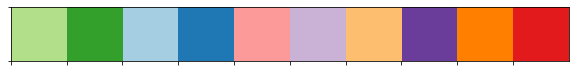

In [29]:
escala_colores = ['#b2df8a', '#33a02c', '#a6cee3', '#1f78b4', '#fb9a99', '#cab2d6', '#fdbf6f', '#6a3d9a', '#ff7f00', '#e31a1c']
sns.palplot(sns.color_palette(escala_colores))